<a href="https://colab.research.google.com/github/AmiMunshi/SpeechProcessingRecognition/blob/main/Assignment/SpeechRecognitionAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

In [ ]:
pip install opendatasets

Dataset : https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio


About dataset

Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.


In [ ]:
import opendatasets as od

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-song-audio")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amimunshi
Your Kaggle Key: ··········


100%|██████████| 456M/456M [00:06<00:00, 76.5MB/s]


In [ ]:
# importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline


#### Load the audio files for male and female actors with happy and sad emotion

In [ ]:
MaleHappy="/content/ravdess-emotional-song-audio/Actor_01/03-02-03-01-01-01-01.wav"
MaleSad="/content/ravdess-emotional-song-audio/Actor_01/03-02-04-01-01-02-01.wav"
FemaleHappy="/content/ravdess-emotional-song-audio/Actor_02/03-02-03-01-01-02-02.wav"
FemaleSad="/content/ravdess-emotional-song-audio/Actor_02/03-02-04-01-02-01-02.wav"


#### Display the audio tab

In [ ]:
#To display audio tab to play the audio for Male Happy
ipd.Audio(MaleHappy)

In [ ]:
#To display audio tab to play the audio for Male Sad
ipd.Audio(MaleSad)

In [ ]:
#To display audio tab to play the audio for Female Happy
ipd.Audio(FemaleHappy)

In [ ]:
#To display audio tab to play the audio for Female Sad
ipd.Audio(FemaleSad)

### Display the plots

In [ ]:
def disp_plt(path, i):
  x,sr=librosa.load(path)
  plt.figure(figsize=(20,5))
  #plt.subplot(2,2,i+1)
  librosa.display.waveshow(x,sr=sr)
  #plt.plot(x)
  return


In [ ]:
paths=[MaleHappy, MaleSad, FemaleHappy,FemaleSad]

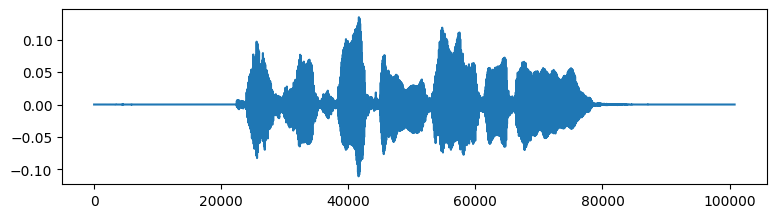

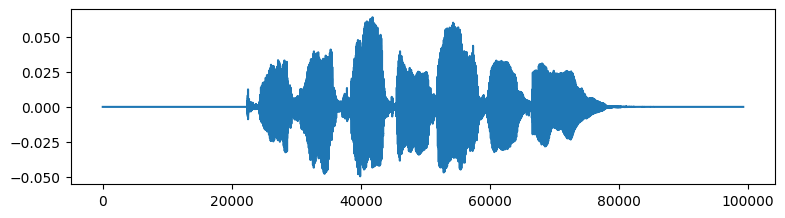

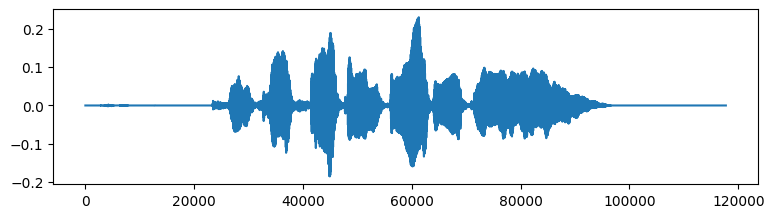

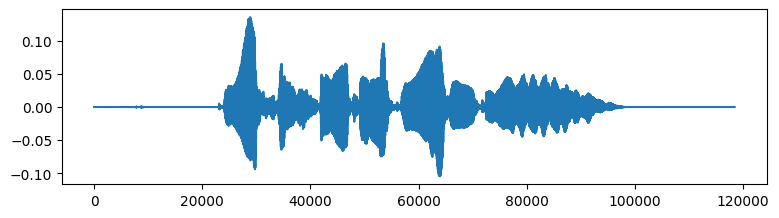

In [ ]:
for i in range(len(paths)):
  plt.figure(figsize=(20,5))

  disp_plt(paths[i],i)


### Spectogram

In [ ]:
def disp_spec(path):
  x,sr=librosa.load(path)
  X= librosa.stft(x) #convert audio signal to short term fourier transform
  XdB= librosa.amplitude_to_db(X)
  plt.figure(figsize=(15,5))
  librosa.display.specshow(XdB, sr=sr, x_axis= "time", y_axis="hz")
  plt.colorbar()
  return

<ipython-input-52-76f7e011bcf9>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  XdB= librosa.amplitude_to_db(X)


<Figure size 2000x500 with 0 Axes>

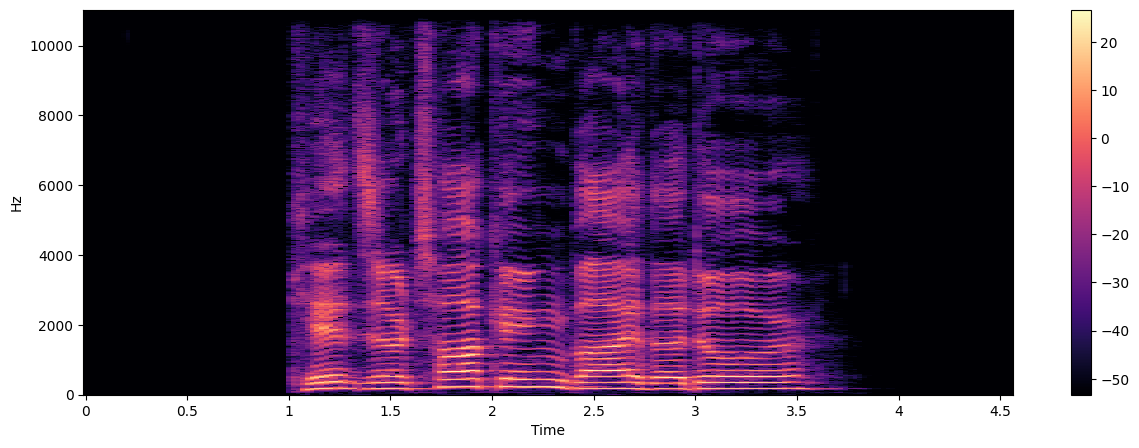

<Figure size 2000x500 with 0 Axes>

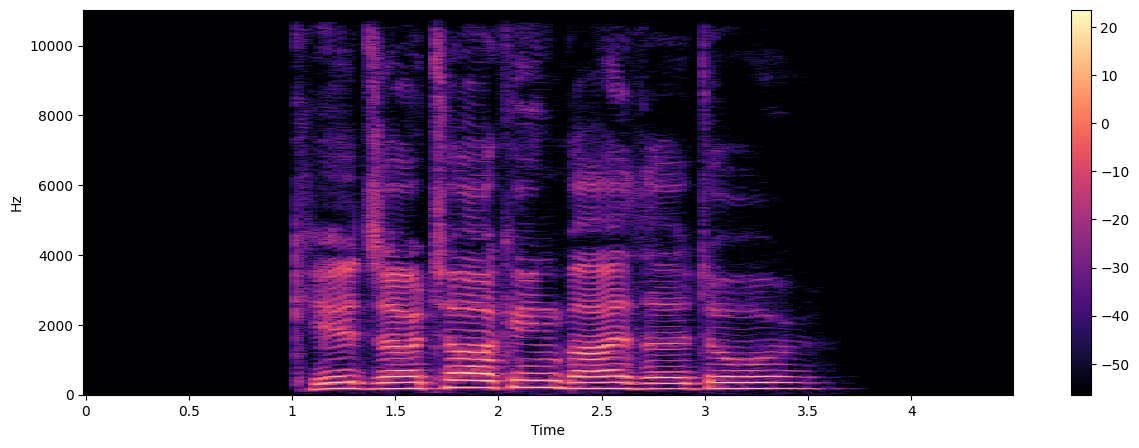

<Figure size 2000x500 with 0 Axes>

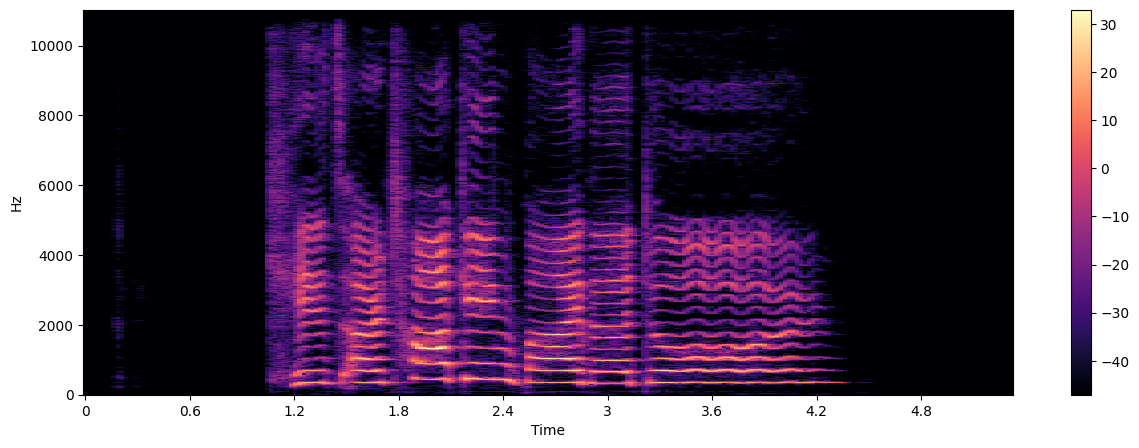

<Figure size 2000x500 with 0 Axes>

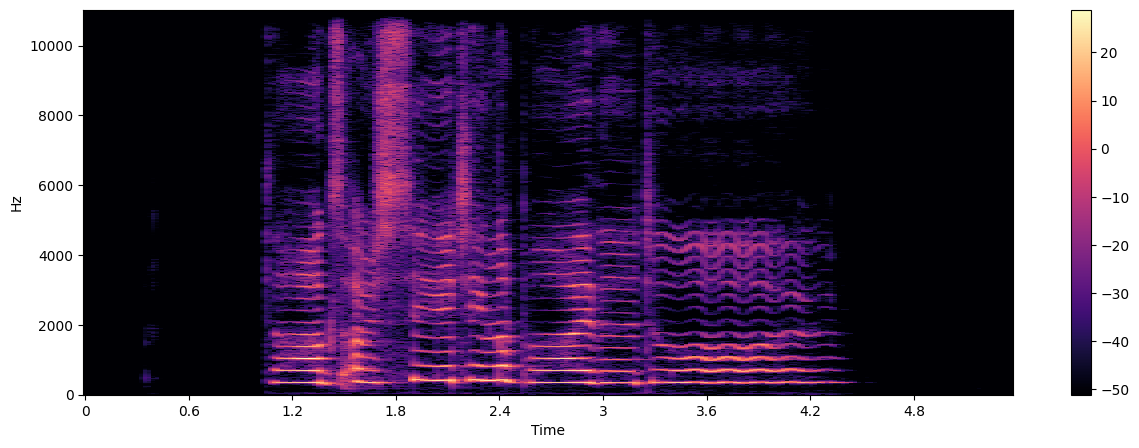

In [ ]:
for i in range(len(paths)):
  plt.figure(figsize=(20,5))

  disp_spec(paths[i])

### Display Zero crossing

In [ ]:
def disp_zero(path):
  x,sr=librosa.load(path)
  zero_crossing=librosa.zero_crossings(x)
  print("Sum of zero crossing", zero_crossing.sum())
  plt.figure(figsize=(20,5))
  plt.title("Zero Crossing Rate of Angry Woman")
  zcrs=librosa.feature.zero_crossing_rate(x)
  plt.plot(zcrs[0])
  plt.show()
  return

Sum of zero crossing 25448


<Figure size 2000x500 with 0 Axes>

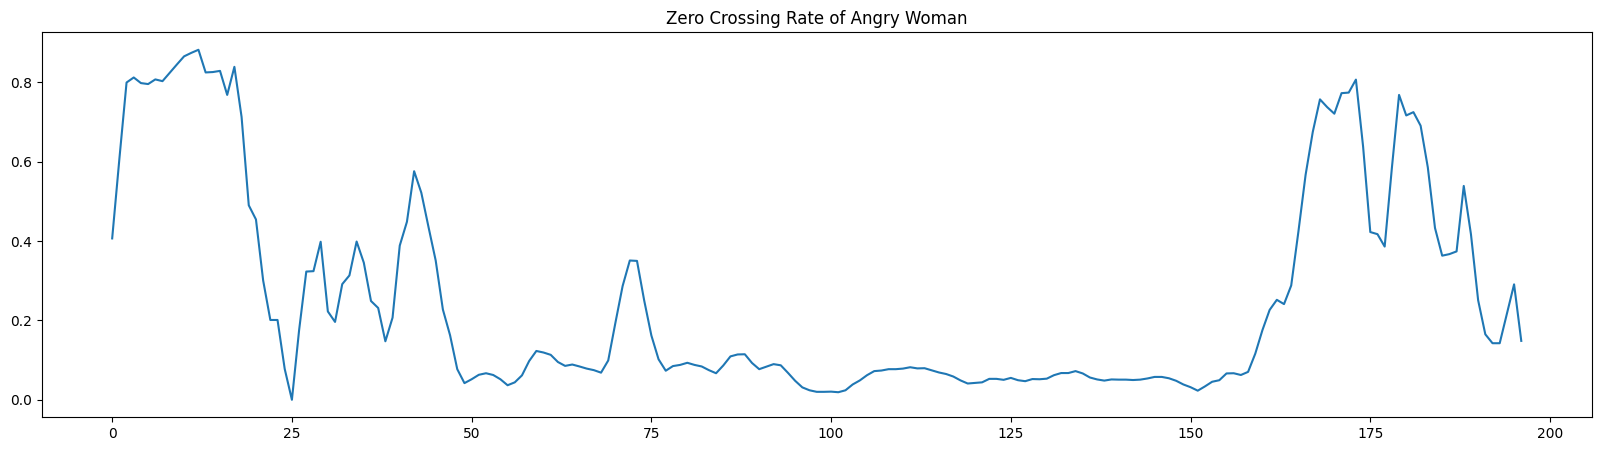

Sum of zero crossing 22137


<Figure size 2000x500 with 0 Axes>

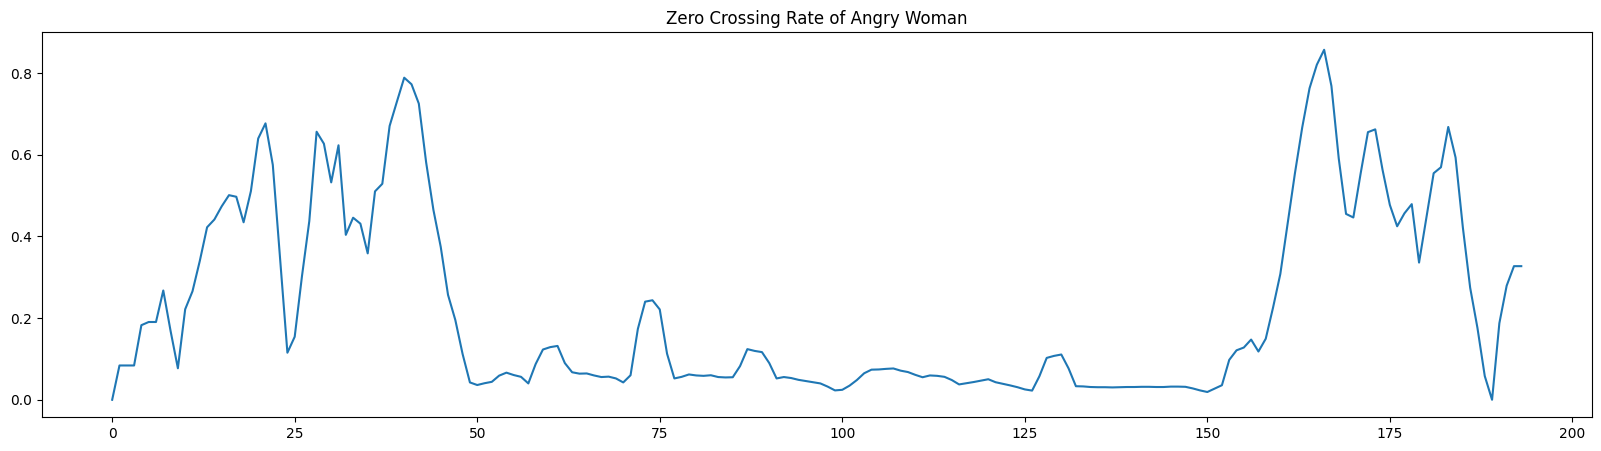

Sum of zero crossing 40676


<Figure size 2000x500 with 0 Axes>

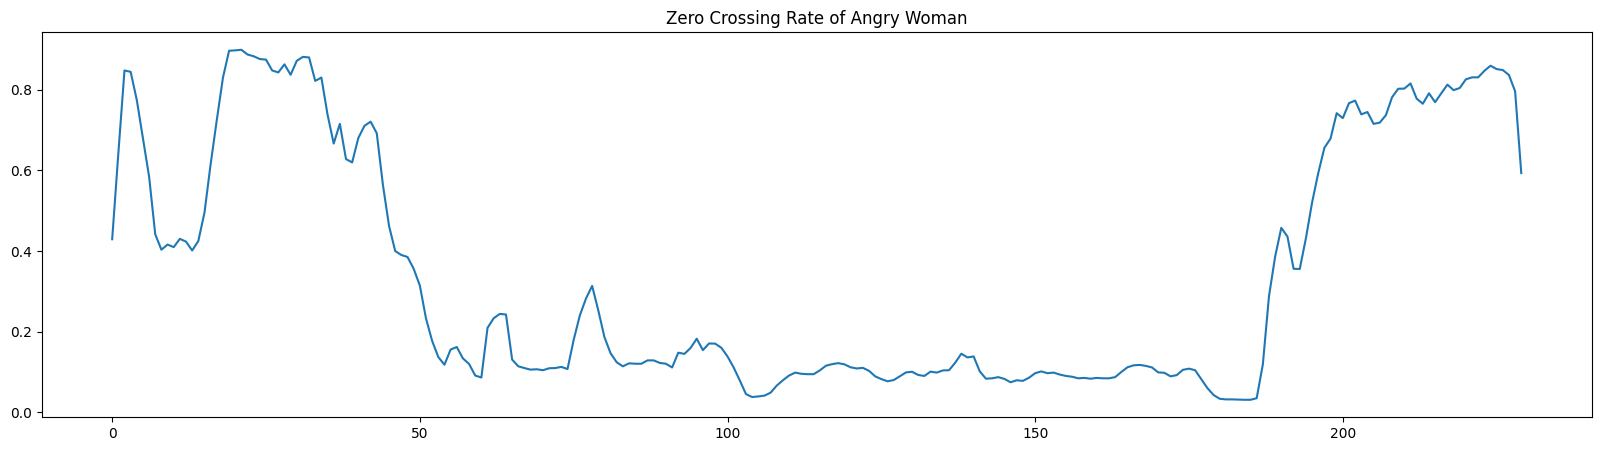

Sum of zero crossing 33357


<Figure size 2000x500 with 0 Axes>

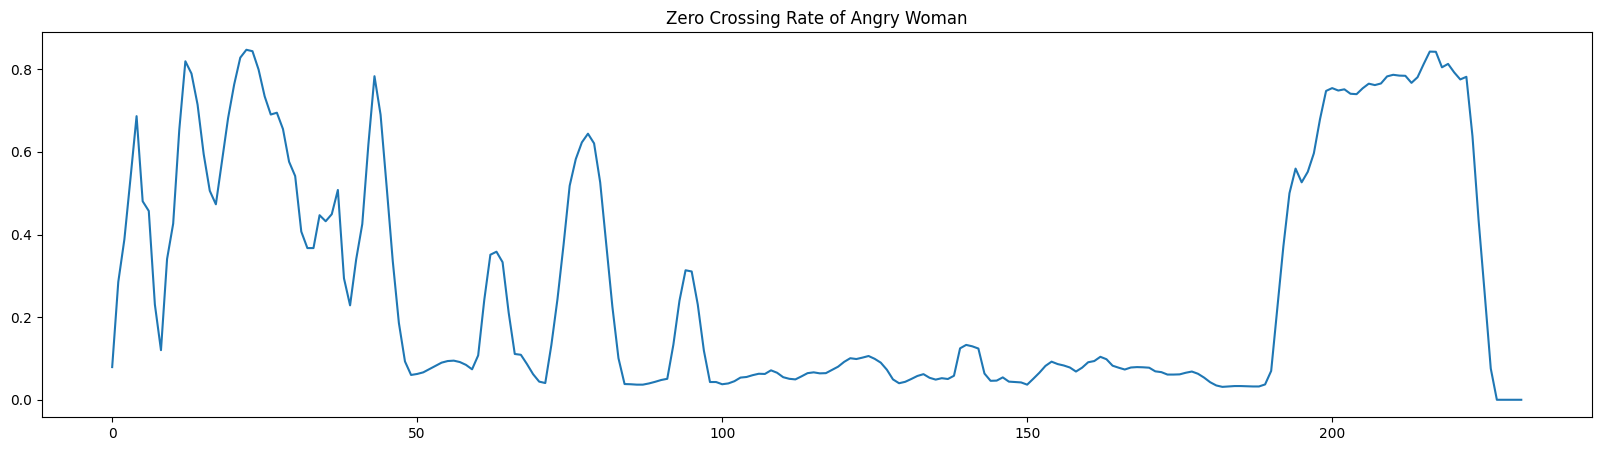

In [ ]:
for i in range(len(paths)):
  plt.figure(figsize=(20,5))

  disp_zero(paths[i])
  #disp_zero(path)

#### Display Spectral Centroid

In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
def normalize(x,axis=0):
  return minmax_scale(x,axis=axis)

In [ ]:
def disp_spec_centroid(path):
  x,sr=librosa.load(path)
  plt.figure(figsize=(20,5))
  plt.title("Spectral centroids of angry man")
  spectral_centroids=librosa.feature.spectral_centroid(y=x, sr=sr)[0]
  frames=range(len(spectral_centroids))
  t=librosa.frames_to_time(frames)
  librosa.display.waveshow(x,sr=sr,alpha=0.4)
  plt.plot(t,normalize(spectral_centroids), color="r")
  plt.show()
  return

<Figure size 2000x500 with 0 Axes>

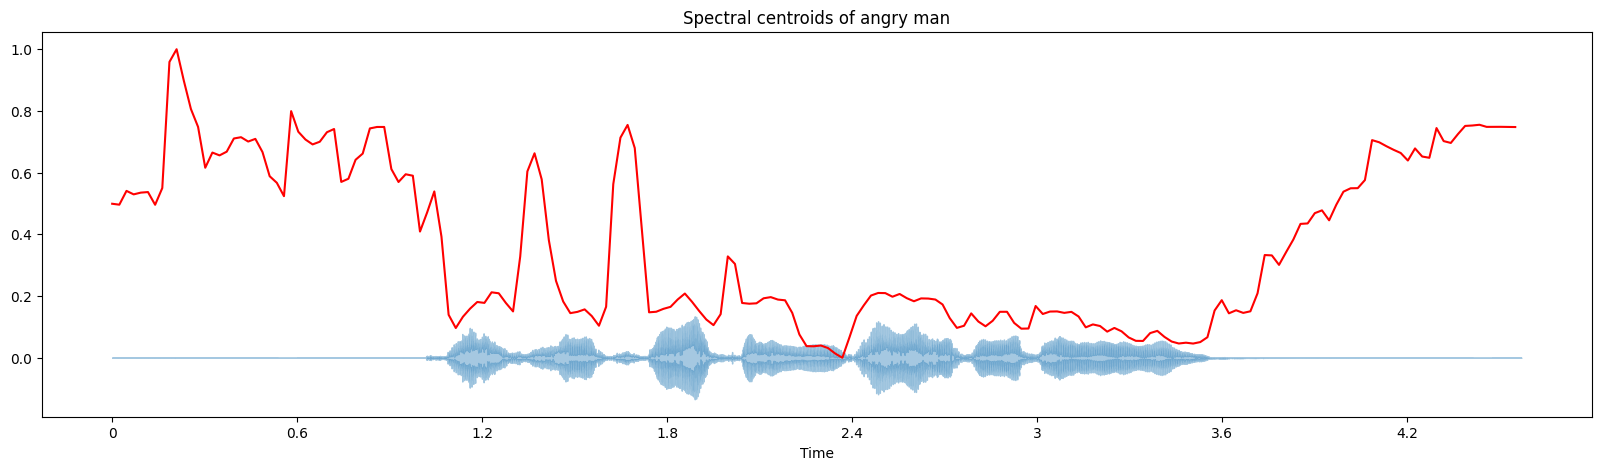

<Figure size 2000x500 with 0 Axes>

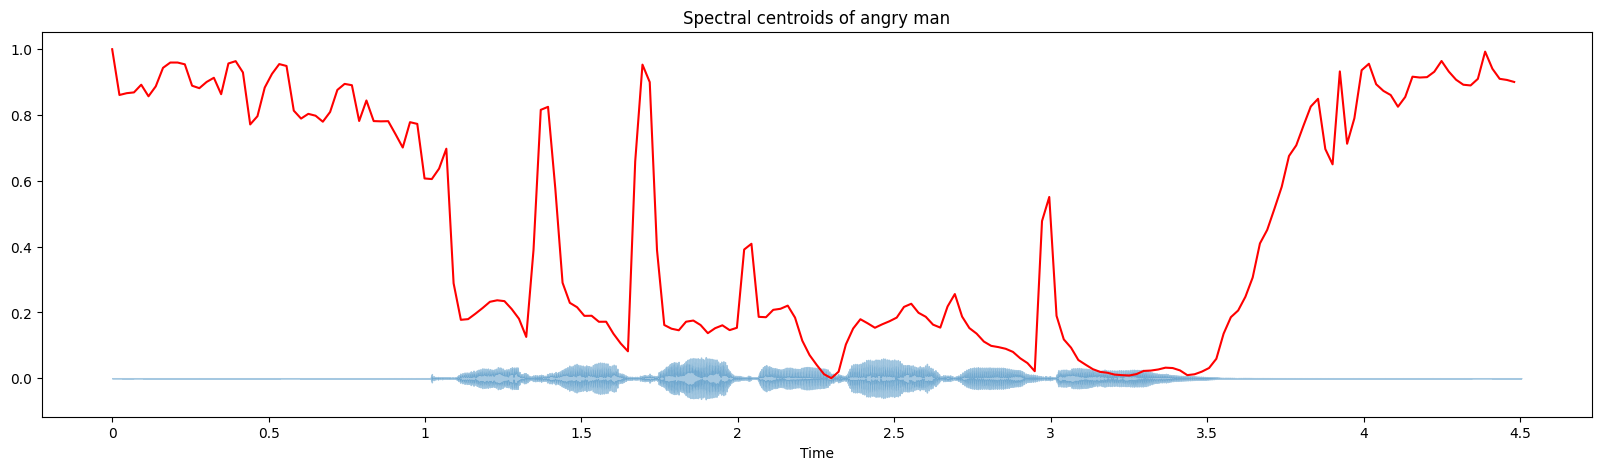

<Figure size 2000x500 with 0 Axes>

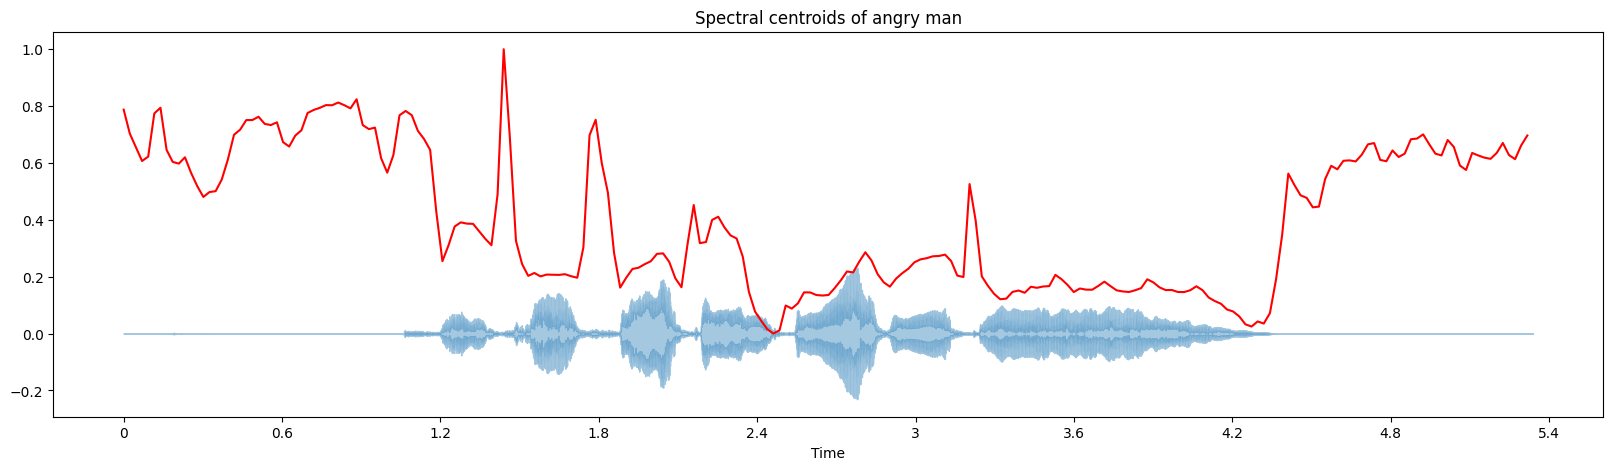

<Figure size 2000x500 with 0 Axes>

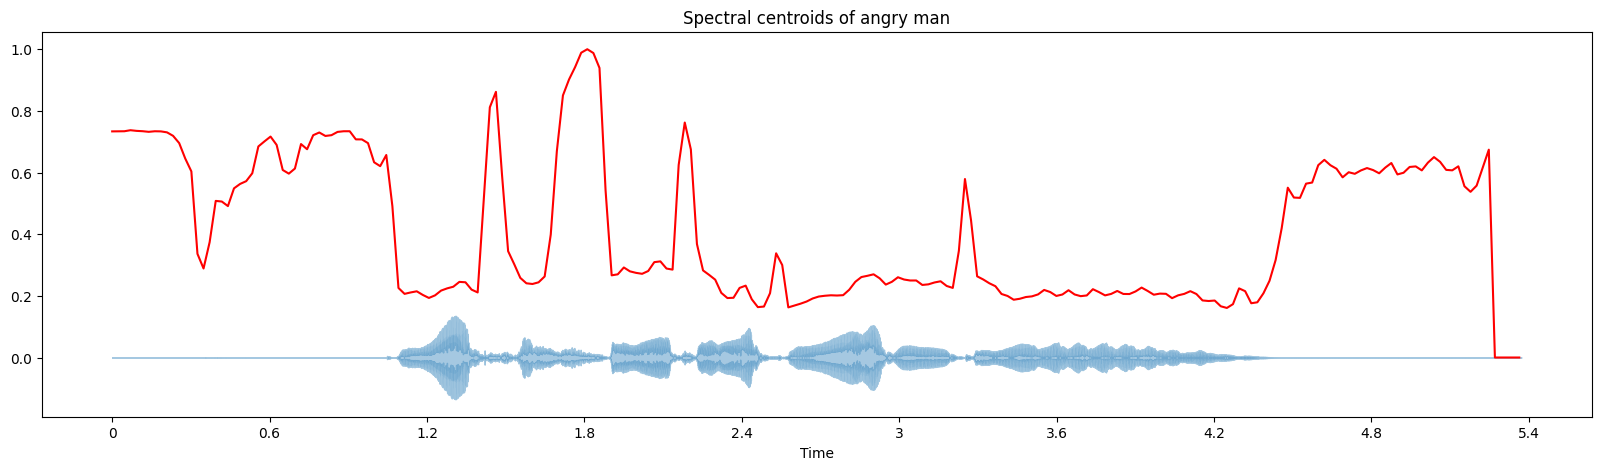

In [ ]:
for i in range(len(paths)):
  plt.figure(figsize=(20,5))

  disp_spec_centroid(paths[i])

### Spectral Roll off

In [ ]:
def disp_spec_roll(path):
  x,sr=librosa.load(path)
  plt.figure(figsize=(20,5))
  plt.title("Spectral rolloffs of angry man")
  spectral_rolloffs=librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
  frames=range(len(spectral_rolloffs))
  t=librosa.frames_to_time(frames)
  librosa.display.waveshow(x,sr=sr,alpha=0.4)
  plt.plot(t,normalize(spectral_rolloffs), color="r")
  plt.show()
  return

<Figure size 2000x500 with 0 Axes>

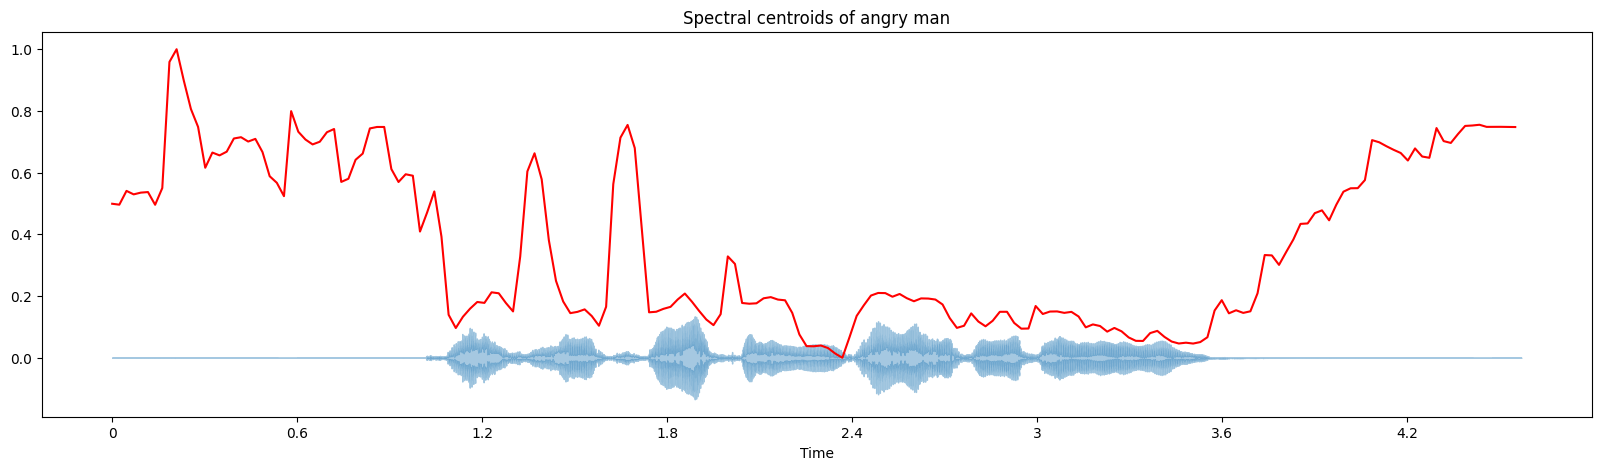

<Figure size 2000x500 with 0 Axes>

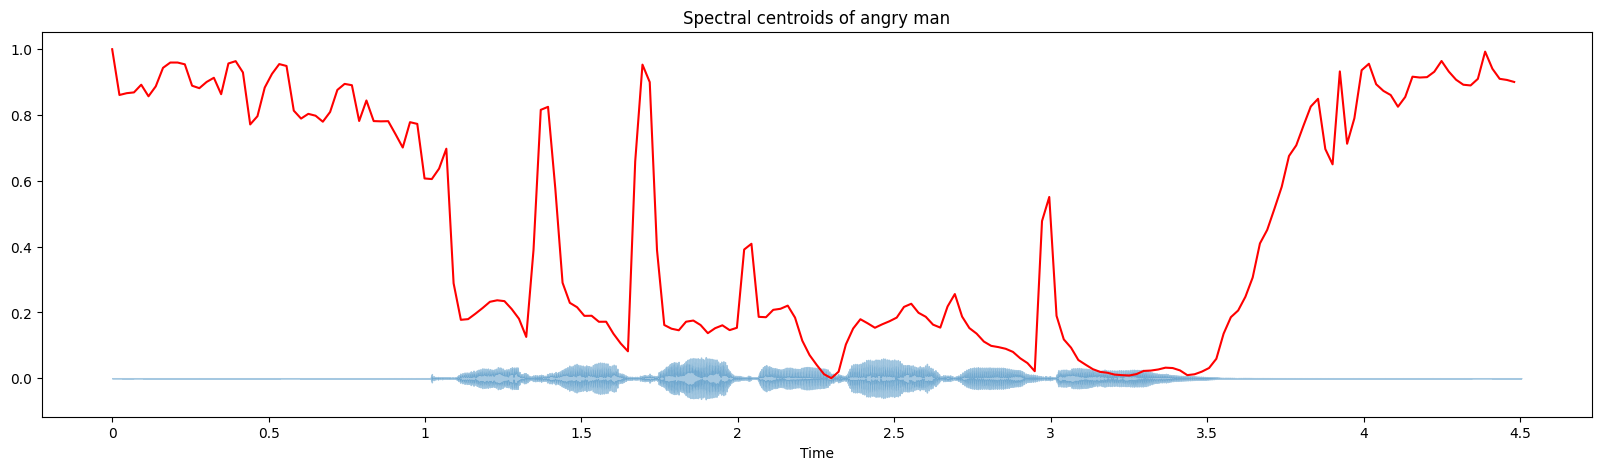

<Figure size 2000x500 with 0 Axes>

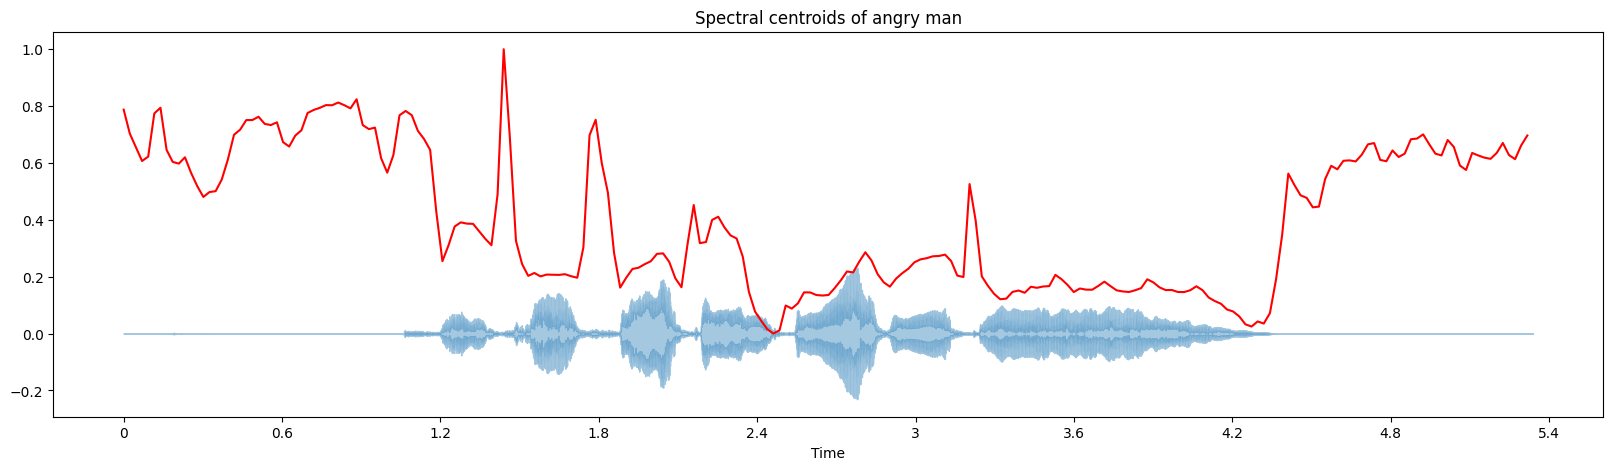

<Figure size 2000x500 with 0 Axes>

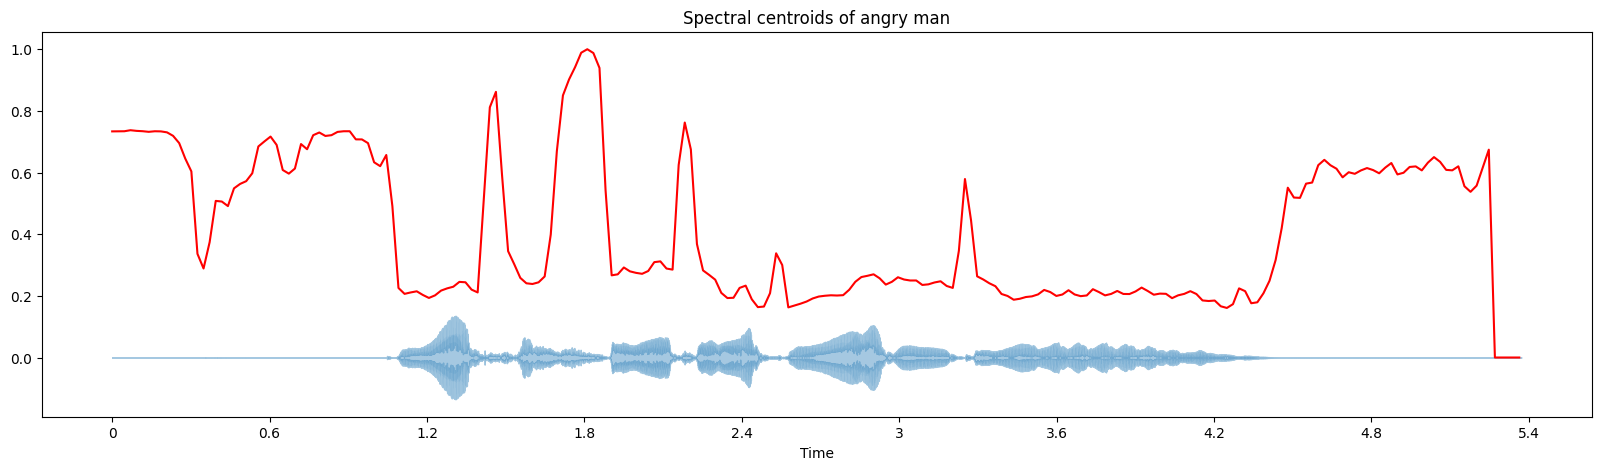

In [ ]:
for i in range(len(paths)):
  plt.figure(figsize=(20,5))

  disp_spec_centroid(paths[i])